https://www.datacamp.com/tutorial/social-network-analysis-python

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

total_list = pd.read_csv('/content/gdrive/MyDrive/Msc_project/data/edge_list.csv', index_col=0)
key_list = pd.read_csv('/content/gdrive/MyDrive/Msc_project/data/player_list.csv', index_col=0)
print(total_list) 
print(key_list)

         player_1   player_2  with_games  with_gpm_sum  with_xpm_sum
0       174620674  221340119         401        175046        227532
1       174620674  468597026         271        108871        145389
2       174620674  390421107         242        101693        131508
3       129745278  174620674         185         72441         93436
4       174620674  461773767         146         65231         85109
...           ...        ...         ...           ...           ...
138487  233684991  414357538          13          6783          7043
138488  233684991  342996932           9          2608          3707
138489  233684991  351757202           8          3549          4346
138491  116390399  233684991           5          2008          2780
138492  233684991  336918491           5          1324          2224

[127136 rows x 5 columns]
               0
0      174620674
1       19873794
2      213106702
3        8429583
4      172384280
...          ...
1499   247832548
1500  128

In [ ]:
games_0 = total_list.loc[total_list['with_games']==0]
print(games_0)

         player_1   player_2  with_games  with_gpm_sum  with_xpm_sum
657      32995405  146153513           0             0             0
780      50089628  184901683           0             0             0
790     123848580  184901683           0             0             0
799      93924427  184901683           0             0             0
801     124666078  184901683           0             0             0
...           ...        ...         ...           ...           ...
138464     212990  114124870           0             0             0
138465     212990  116287390           0             0             0
138467     212990  136010172           0             0             0
138469     212990  177893917           0             0             0
138470     212990  179258262           0             0             0

[4793 rows x 5 columns]


In [ ]:
aim_player = key_list['0'].values.tolist()
print(len(aim_player), aim_player)

1504 [174620674, 19873794, 213106702, 8429583, 172384280, 106962969, 52781082, 412729377, 123592743, 146153513, 372908075, 184901683, 340082747, 186384447, 492478542, 169025618, 127606869, 112549974, 112730198, 391807064, 41173088, 410017898, 90882159, 258302071, 144048252, 274063488, 317636746, 121847953, 281854104, 107454620, 92536996, 367878309, 419954861, 1115996334, 107561134, 98885811, 229023938, 121839811, 153133254, 98443465, 46440650, 199082186, 108093643, 88826062, 103030993, 432414931, 72712411, 145031389, 327450853, 1009844461, 89137399, 386859265, 10371341, 92856596, 22176022, 78905623, 1068351769, 57516313, 9994526, 123855135, 93978919, 167846196, 95928636, 155189570, 64758082, 102842698, 416833868, 359457103, 307265874, 24191321, 128926044, 221028714, 125509994, 93069676, 85172589, 374243694, 140288368, 417415543, 9388407, 129745278, 108290431, 10805630, 172769671, 402375059, 344433045, 174195096, 36299163, 86802844, 213402017, 117645732, 5448108, 216228274, 81797559, 56

In [ ]:
node_list_1 = total_list.loc[:,'player_1'].unique()
node_list_2 = total_list.loc[:,'player_2'].unique()
print(type(node_list_1),len(node_list_1),len(node_list_2))

<class 'numpy.ndarray'> 29827 30475


In [ ]:
node_list = list(node_list_1)+list(node_list_2)
print(len(node_list),node_list)
node_list_cleaned = list(set(node_list))
print(len(node_list_cleaned),node_list_cleaned)

60302 [174620674, 129745278, 127943801, 143206259, 100109929, 19873794, 213106702, 150772142, 86811121, 147949682, 116537283, 108839543, 98929037, 177453058, 128926044, 3900522, 192720221, 127786923, 167081511, 8384516, 186995967, 40903927, 137911334, 183179876, 183596961, 8429583, 3788342, 234095, 1145452, 146578267, 172384280, 84211454, 111525780, 116217506, 67903048, 143549254, 152668616, 116919926, 106962969, 96275993, 100017039, 94638129, 91041804, 65867110, 89098750, 91425149, 86079719, 92540502, 45152056, 68688703, 102643998, 84414741, 98975692, 98997326, 23883296, 52781082, 43619695, 25907144, 18322503, 42989814, 25175582, 35125459, 1522705, 49382246, 42439713, 17559114, 33003047, 45216013, 42163804, 7439022, 19084463, 8517055, 52084357, 34322358, 32995405, 22998462, 31322211, 822584, 4281729, 7523309, 22442123, 31456357, 37651406, 47991015, 49084265, 52309044, 46852985, 47508363, 26356855, 45964861, 20321748, 24937714, 26682464, 27553803, 31966955, 32963860, 40805086, 23840371

In [ ]:
# node_list.shape[0]

In [ ]:
# Construct the graph

# Define G
G = nx.Graph() 

# Add all nodes
for node in node_list_cleaned:
  G.add_node(node)

In [ ]:
# sort out all edges
edges = total_list.loc[:,'player_1':'with_games']
edge_list = edges.values.tolist()
# edge_list

In [ ]:
# Add all edges
for edge in edge_list:
  G.add_edge(edge[0],edge[1])

In [ ]:
# Add weights for each edge
for edge in edge_list:
  G.edges[edge[0],edge[1]]['distance'] = 1/(edge[2]+1)
  G.edges[edge[0],edge[1]]['connection_str'] = edge[2]+1

In [ ]:
G_aim = G.subgraph(aim_player)

In [ ]:
deg_cen_all = nx.degree_centrality(G)

# print(type(deg_cen_all))
# print(deg_cen_all)
# del deg_cen
deg_cen = {}
for player in aim_player:
  deg_cen[player] = deg_cen_all[player]

print(deg_cen)

{174620674: 0.0005435099093503116, 19873794: 0.00011646640914649534, 213106702: 0.0005823320457324767, 8429583: 0.0013199526369936138, 172384280: 0.00025234388648407325, 106962969: 0.0014946522507133567, 52781082: 0.004464545683948988, 412729377: 0.0012034862278471185, 123592743: 0.0007376205912611371, 146153513: 0.004037502183745172, 372908075: 0.0007182095230700545, 184901683: 0.0033969369334394474, 340082747: 0.0014946522507133567, 186384447: 0.0026399052739872276, 492478542: 7.764427276433022e-05, 169025618: 0.00508569986606363, 127606869: 0.0007570316594522196, 112549974: 0.0014558301143311916, 112730198: 0.00023293281829299067, 391807064: 0.0011646640914649534, 41173088: 0.0008929091367897976, 410017898: 3.882213638216511e-05, 90882159: 0.004115146456509502, 258302071: 0.0015528854552866044, 144048252: 0.001979928955490421, 274063488: 0.0006793873866878894, 317636746: 0.0005823320457324767, 121847953: 0.003882213638216511, 281854104: 0.0004076324320127337, 107454620: 0.0006987984

In [ ]:
bet_cen = nx.betweenness_centrality(G_aim, weight = 'distance', normalized = True)
clo_cen = nx.closeness_centrality(G_aim)
eig_cen = nx.eigenvector_centrality(G_aim, weight = 'connection_str', max_iter = 500)

# type(bet_cen)
# print(bet_cen)

In [ ]:
centrality = pd.DataFrame.from_dict(deg_cen,orient= 'index', columns=['deg_cen'])

In [ ]:
bet_cen_ser =  pd.Series(bet_cen,index=bet_cen.keys())
clo_cen_ser =  pd.Series(clo_cen,index=clo_cen.keys())
eig_cen_ser =  pd.Series(eig_cen,index=eig_cen.keys())

In [ ]:
# df.from_dict(bet_cen, orient= 'index', columns=['bet_cen'])
# df.from_dict

In [ ]:
centrality['bet_cen'] = bet_cen_ser
centrality['clo_cen'] = clo_cen_ser
centrality['eig_cen'] = eig_cen_ser
centrality

In [ ]:
centrality.to_csv('player_centrality.csv')
!cp player_centrality.csv 'gdrive/MyDrive/Msc_project/data/player_centrality.csv'

In [ ]:
centrality = pd.read_csv('gdrive/MyDrive/Msc_project/data/player_centrality.csv' ,index_col =0)
centrality

,deg_cen,bet_cen,clo_cen,eig_cen
174620674,0.000544,0.001371,0.260035,1.313881e-06
19873794,0.000116,0.000000,0.183516,7.028445e-10
213106702,0.000582,0.015924,0.253414,8.359860e-07
8429583,0.001320,0.000000,0.219769,1.373293e-09
172384280,0.000252,0.000000,0.185144,2.256013e-10
...,...,...,...,...
247832548,0.003882,0.000000,0.250584,7.403579e-08
1284300791,0.000252,0.000000,0.169486,1.141388e-13
258072572,0.001495,0.001331,0.214133,1.988138e-10
212990,0.002058,0.000000,0.244788,1.128061e-06


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

def histo(X, log):
  f, ax = plt.subplots(figsize=(7, 5))
  sns.despine(f)

  sns.histplot(
      X,
      log_scale=log,
  )


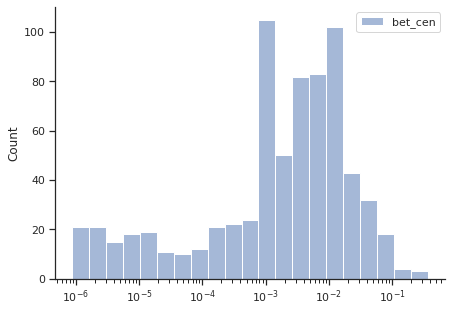

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

df = centrality.loc[ centrality['bet_cen'] != 0]#.map(lambda x : x + 1)

sns.histplot(
    df[['bet_cen']],
    log_scale=True
)

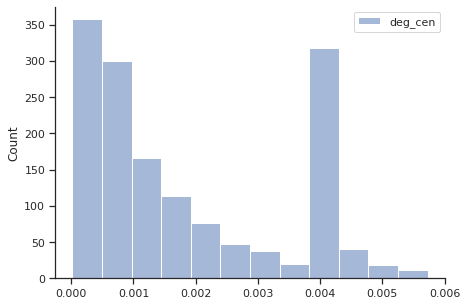

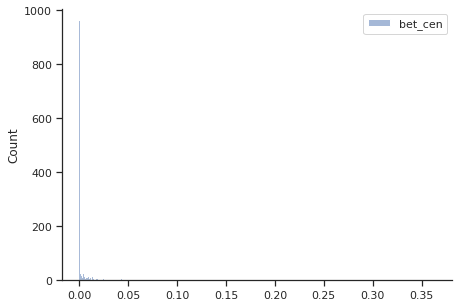

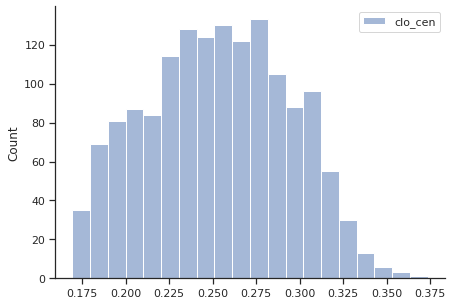

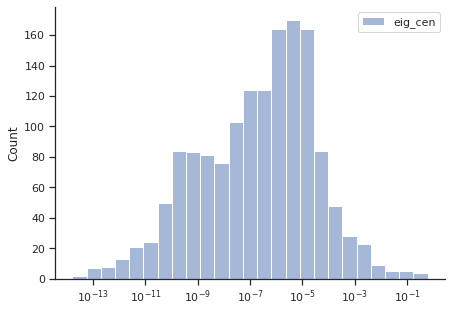

In [ ]:
centrality_key = {'deg_cen':False,	'bet_cen':False,	'clo_cen':False,	'eig_cen':True}

for cen, log in centrality_key.items():
  histo(centrality[[str(cen)]], log)

In [ ]:
centrality_log = centrality.apply(np.log)

centrality_log

,deg_cen,bet_cen,clo_cen,eig_cen
174620674,-7.517463,-6.592551,-1.346941,-13.542525
19873794,-9.057908,-inf,-1.695451,-21.075885
213106702,-7.448470,-4.139942,-1.372730,-13.994654
8429583,-6.630159,-inf,-1.515178,-20.406055
172384280,-8.284718,-inf,-1.686621,-22.212252
...,...,...,...,...
247832548,-5.551350,-inf,-1.383963,-16.418717
1284300791,-8.284718,-inf,-1.774986,-29.801361
258072572,-6.505862,-6.622071,-1.541158,-22.338652
212990,-6.186228,-inf,-1.407362,-13.695010


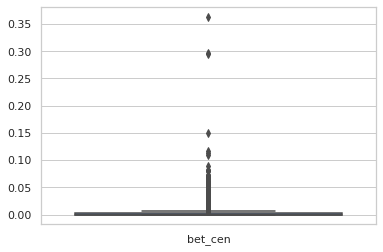

In [ ]:
seaborn.boxplot(data=centrality[['bet_cen']])

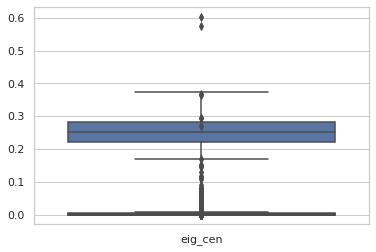

In [ ]:
import seaborn
 
seaborn.set(style='whitegrid')
 
seaborn.boxplot(data=centrality[['deg_cen']])
seaborn.boxplot(data=centrality[['bet_cen']])
seaborn.boxplot(data=centrality[['clo_cen']])
seaborn.boxplot(data=centrality[['eig_cen']])

In [ ]:
# count the triangle clique containing each node
from itertools import combinations

def find_triangle_nodes(G , node):

  triangle_nodes = set([node])
  

  for node1, node2 in combinations(G.neighbors(node),2):

    if G.has_edge(node1,node2):

      triangle_nodes.add(node1)

      triangle_nodes.add(node2)
      

  return len(triangle_nodes)

In [ ]:
from itertools import combinations

def find_square_nodes(G, node):
  
  square_nodes = set([node])
  
  for node1, node2, node3 in combinations(G.neighbors(node),3):
    if (G.has_edge(node1,node2))and(G.has_edge(node2,node3))and(G.has_edge(node1,node3)):

      square_nodes.add(node1)

      square_nodes.add(node2)

      square_nodes.add(node3)

  return len(square_nodes)

In [ ]:
from networkx.algorithms.clique import node_clique_number

# print(node_clique_number(G,aim_player[0]))

from networkx.algorithms.clique import number_of_cliques

# print(aim_player[0],number_of_cliques(G,aim_player[0]))

In [ ]:
# count the number of edges of each node
clique_attribute = []

cnt =0

for node in aim_player:

  # print(node)

  edge_node = len(list(G.neighbors(node)))

  triangle_node = find_triangle_nodes(G , node)

  square_node = find_square_nodes(G , node)

  max_size_clique = node_clique_number(G, node)

  # number_clique = number_of_cliques(G, node)

  clique_attribute.append([edge_node, triangle_node, square_node, max_size_clique, #number_clique
                           ])

  cnt+=1

  print(cnt)

clique_attribute

In [ ]:
clique_attribute2array = np.array(clique_attribute)

clique_attribute2array

array([[ 28,  29,  27,   8],
       [  6,   7,   6,   5],
       [ 30,  26,  23,   8],
       ...,
       [ 77,  30,  11,   4],
       [106,  49,  42,   8],
       [ 22,  23,  21,  11]])

In [ ]:
centrality['edge_node'] = clique_attribute2array[:,0]

centrality['triangle_node'] = clique_attribute2array[:,1]

centrality['square_node'] = clique_attribute2array[:,2]

centrality['max_size_clique'] = clique_attribute2array[:,3]

# centrality['number_of_cliques'] = clique_attribute2array[:,4]

In [ ]:
centrality

,deg_cen,bet_cen,clo_cen,eig_cen,edge_node,triangle_node,square_node,max_size_clique
174620674,0.000544,0.001371,0.260035,1.313881e-06,28,29,27,8
19873794,0.000116,0.000000,0.183516,7.028445e-10,6,7,6,5
213106702,0.000582,0.015924,0.253414,8.359860e-07,30,26,23,8
8429583,0.001320,0.000000,0.219769,1.373293e-09,68,1,1,2
172384280,0.000252,0.000000,0.185144,2.256013e-10,13,8,8,6
...,...,...,...,...,...,...,...,...
247832548,0.003882,0.000000,0.250584,7.403579e-08,200,15,9,4
1284300791,0.000252,0.000000,0.169486,1.141388e-13,13,4,1,3
258072572,0.001495,0.001331,0.214133,1.988138e-10,77,30,11,4
212990,0.002058,0.000000,0.244788,1.128061e-06,106,49,42,8


In [ ]:
centrality.to_csv('player_all_attribute.csv')
!cp player_all_attribute.csv 'gdrive/MyDrive/Msc_project/data/player_all_attribute.csv'

In [ ]:
sna = pd.read_csv('/content/drive/MyDrive/Msc_project/data/player_all_attribute.csv' ,index_col =0)

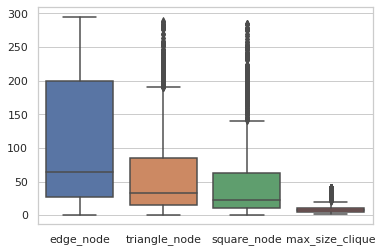

In [ ]:
seaborn.set(style='whitegrid')
 
seaborn.boxplot(data=sna[['edge_node','triangle_node','square_node','max_size_clique']])

In [ ]:
from networkx.algorithms.clique import cliques_containing_node
# count edges number for each node

# edges_number = np.array()

for node in aim_player:
  cliques_list = cliques_containing_node(G,[node])
  print(cliques_list)

In [ ]:
# cliques_number = np.array()

cliques_number =[]
cnt=0

for node in aim_player[:100]:
  edges, triangle, square, pentagon = 0,0,0,0
  cliques_list = cliques_containing_node(G,[node])
  for clique in cliques_list[node]:
    if len(clique) == 2:
      edges += 1
    elif len(clique) == 3:
      triangle += 1
    elif len(clique) == 4:
      square += 1
    elif len(clique) == 5:
      pentagon += 1
    else:
      pass

  cliques_number.append([node, edges, triangle, square, pentagon])
  cnt += 1
  print(cnt)
  print([node, edges, triangle, square, pentagon])

print(cliques_number)

In [ ]:
number_of_quares_with_node(G, aim_player[0])

In [ ]:
from networkx.algorithms.clique import enumerate_all_cliques
list(enumerate_all_cliques(G))

In [ ]:
# print (set(list(total_list.loc[:,'player_1'])+list(total_list.loc[:,'player_2']))> set(aim_player))

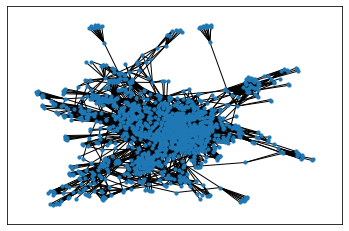

In [ ]:
nx.draw_networkx(G_aim, 
          with_labels = False, 
          # edgelist = aim_player, 
          node_size = 10,
          pos = nx.spring_layout(G_aim))